## <div align="center"> UJIAN TENGAH SEMESTER IF540-L MACHINE LEARNING </div>
## <div align="center"> Semester Gasal 2024/2025 </div>
## <div align="center"> Pengembangan Model Prediksi Tipe Curah Hujan dengan Analisis Regresi pada Data Cuaca Historis </div>

---
### Kelompok - 4

#### Anggota Kelompok : 
| Nama                          | NIM         |
| ----------------------------- | ----------- |
| Brightly Virya                | 00000068227 |
| Batara Hotdo Horas Simbolon   | 00000078626 |
| Daniel Isaach Hatuaon Siregar | 00000078609 |
| Christopher Alvaro            | 00000073214 |

---

### Dataset yang digunakan untuk projek:

1. weatherHistory.csv – sumber : https://www.kaggle.com/datasets/muthuj7/weather-dataset

### Instaling dependencies
* don't need to run this code if you already have all the dependencies

In [273]:
%pip install pandas
%pip install matplotlib
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a las

### Import all the libraries

In [274]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

### Pre-processing

### Load train data

In [275]:
df = pd.read_csv('WeatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### Data information

In [276]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


#### Handle missing values di kolom 'Precip Type' dengan di isi most frequent value

In [277]:
precip_imputer = SimpleImputer(strategy='most_frequent')
df['Precip Type'] = precip_imputer.fit_transform(df[['Precip Type']]).ravel()
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [278]:
NullValue = df.isnull().sum()
NullValue

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

### Drop kolom yang tidak di butuhkan untuk logistic regression
#### * 'Formatted Date', 'Summary', dan 'Daily Summary' di drop karena tidak cocok dengan logistic regression karena non-numeric.
#### * 'Formated Date' di format ulang karena tidak bisa digunakan langsung pada logistic regression

In [279]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Hour'] = df['Formatted Date'].dt.hour
df = df.drop(columns=['Formatted Date'])

df = df.drop(columns=['Summary', 'Daily Summary'])

### Encode categorical data di kolom 'Precip Type' jadi numerical

In [280]:

label_encoder = LabelEncoder()
df['Precip Type'] = label_encoder.fit_transform(df['Precip Type'])
df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006,3,31,22
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006,3,31,23
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006,4,1,0
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006,4,1,1
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,2016,9,9,17
96449,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,2016,9,9,18
96450,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,2016,9,9,19
96451,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,2016,9,9,20


### pastikan semua feature columns numeric dan handle segala data yang non numeric
* Fungsi pd.get_dummies() digunakan untuk mengubah data kategorikal menjadi beberapa kolom biner (0 atau 1) sehingga model dapat memprosesnya dengan baik. Dengan drop_first=True, kita menghindari masalah multikolinearitas. dengan menghapus satu kategori sebagai referensi.

In [281]:
df = pd.get_dummies(df, drop_first=True)
df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006,3,31,22
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006,3,31,23
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006,4,1,0
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006,4,1,1
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,2016,9,9,17
96449,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,2016,9,9,18
96450,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,2016,9,9,19
96451,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,2016,9,9,20


### Split fitur dan variabel target
#### * X adalah kolom temperature, apparent temperature, humidity, dan windspeed
#### * Y nya adalah pecip type

In [282]:
X = df.drop(columns=['Precip Type'])
y = df['Precip Type']
print(X)
print(y)

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degree

### Standardize the features
* Standarisasi mengubah fitur sehingga memiliki rata-rata 0 dan deviasi standar 1.
* Ini memastikan semua fitur memberikan kontribusi yang setara pada model, sehingga fitur dengan skala yang lebih besar tidak mendominasi.
* X_standar = (X - mean) / std_dev
* Di mana 'mean' adalah rata-rata dari fitur dan 'std_dev' adalah standar deviasi dari fitur.
* StandardScaler digunakan untuk menstandarisasi fitur-fitur dalam dataset dengan mengubahnya sehingga memiliki rata-rata (mean) 0 dan standar deviasi (std) 1. Ini dilakukan agar semua fitur berada pada skala yang setara dan tidak ada satu fitur yang mendominasi model hanya karena skala nilainya yang lebih besar.

In [283]:
columns_to_scale = X.columns.difference(['Year', 'Month', 'Day', 'Hour'])
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour
0,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.0,0.101685,2006,3,31,22
1,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.0,0.105960,2006,3,31,23
2,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.0,0.108610,2006,4,1,0
3,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.0,0.112628,2006,4,1,1
4,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.0,0.113483,2006,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1.474532,1.417400,-1.559811,0.026855,-1.457488,1.372265,0.0,0.095102,2016,9,9,17
96449,1.324468,1.283404,-1.304020,-0.103556,-1.559925,1.241686,0.0,0.101942,2016,9,9,18
96450,1.058076,1.045534,-0.894753,-0.264241,-1.466800,1.372265,0.0,0.106216,2016,9,9,19
96451,1.003983,0.997233,-0.690120,-0.040680,-1.559925,1.372265,0.0,0.108696,2016,9,9,20


# Balancing
### Menggabungkan kembali fitur dan target untuk melakukan balancing

In [284]:
from sklearn.utils import resample

df_balanced = pd.concat([X, y.reset_index(drop=True)], axis=1)
df_balanced

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour,Precip Type
0,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.0,0.101685,2006,3,31,22,0
1,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.0,0.105960,2006,3,31,23,0
2,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.0,0.108610,2006,4,1,0,0
3,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.0,0.112628,2006,4,1,1,0
4,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.0,0.113483,2006,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1.474532,1.417400,-1.559811,0.026855,-1.457488,1.372265,0.0,0.095102,2016,9,9,17,0
96449,1.324468,1.283404,-1.304020,-0.103556,-1.559925,1.241686,0.0,0.101942,2016,9,9,18,0
96450,1.058076,1.045534,-0.894753,-0.264241,-1.466800,1.372265,0.0,0.106216,2016,9,9,19,0
96451,1.003983,0.997233,-0.690120,-0.040680,-1.559925,1.372265,0.0,0.108696,2016,9,9,20,0


### Memisahkan kembali data berdasarkan kelas target

In [285]:

df_majority = df_balanced[df_balanced['Precip Type'] == 0]
df_minority = df_balanced[df_balanced['Precip Type'] == 1]
df_majority
df_minority

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour,Precip Type
1562,-1.299902,-1.402760,1.356212,0.040827,0.293257,-2.353074,0.0,0.242149,2006,12,13,1,1
1563,-1.299902,-1.394450,1.151578,-0.010406,0.116320,-2.391480,0.0,0.241380,2006,12,13,2,1
1564,-1.345852,-1.339916,1.356212,-0.541364,0.172195,-2.429885,0.0,0.239328,2006,12,13,3,1
1565,-1.358066,-1.426131,1.356212,-0.189721,0.107007,-2.429885,0.0,0.240867,2006,12,13,4,1
1566,-1.363301,-1.429767,1.356212,-0.199036,0.293257,-2.391480,0.0,0.245740,2006,12,13,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93265,-1.331311,-1.290577,1.305053,-0.681090,-0.898740,-1.727063,0.0,0.111688,2016,3,28,3,1
93266,-1.365628,-1.118666,0.998104,-1.563692,-1.746175,-2.429885,0.0,0.112628,2016,3,28,4,1
93267,-1.358648,-1.112434,1.356212,-1.563692,-1.746175,-2.283944,0.0,0.114253,2016,3,28,5,1
93311,-1.302810,-1.062575,1.356212,-1.056021,-1.057052,1.034296,0.0,0.011405,2016,3,3,2,1


### Melakukan oversampling pada kelas minoritas

In [286]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # Mengambil sampel dengan penggantian
                                 n_samples=len(df_majority),  # Menyamakan jumlah dengan kelas mayoritas
                                 random_state=42)  # Untuk reproduktivitas
df_minority_upsampled

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour,Precip Type
55184,-2.005434,-2.063394,1.151578,-0.399309,-0.256179,-2.391480,0.0,0.213424,2012,2,23,7,1
3262,-2.361981,-2.367223,0.179571,-0.629857,-1.680987,1.099586,0.0,0.338499,2006,1,23,21,1
46067,-1.881545,-1.579344,1.305053,-0.897665,-0.423803,-1.742426,0.0,0.236421,2011,2,1,10,1
45320,-1.360393,-1.113992,0.998104,-1.542733,-0.814927,-1.657933,0.0,0.248134,2011,12,1,7,1
46636,-1.454619,-1.536237,1.100420,-0.150132,-0.088554,-2.053511,0.0,0.189913,2011,2,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55508,-2.936062,-3.039803,-3.759618,-0.399309,-0.069930,-1.508152,0.0,0.223683,2012,2,9,19,1
66899,-1.258606,-1.520137,-0.229695,1.400826,-1.457488,-0.732359,0.0,0.076208,2013,3,25,10,1
21190,-1.385404,-1.395489,1.151578,-0.480816,-0.842865,-2.399161,0.0,0.206755,2008,1,9,21,1
46341,-1.767543,-1.731519,0.742312,-0.704378,0.013883,-1.031923,0.0,0.235481,2011,2,2,20,1


### Menggabungkan kembali kelas mayoritas dengan kelas minoritas yang sudah di-oversample

In [287]:

df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour,Precip Type
0,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.0,0.101685,2006,3,31,22,0
1,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.0,0.105960,2006,3,31,23,0
2,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.0,0.108610,2006,4,1,0,0
3,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.0,0.112628,2006,4,1,1,0
4,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.0,0.113483,2006,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55508,-2.936062,-3.039803,-3.759618,-0.399309,-0.069930,-1.508152,0.0,0.223683,2012,2,9,19,1
66899,-1.258606,-1.520137,-0.229695,1.400826,-1.457488,-0.732359,0.0,0.076208,2013,3,25,10,1
21190,-1.385404,-1.395489,1.151578,-0.480816,-0.842865,-2.399161,0.0,0.206755,2008,1,9,21,1
46341,-1.767543,-1.731519,0.742312,-0.704378,0.013883,-1.031923,0.0,0.235481,2011,2,2,20,1


### Memisahkan kembali fitur dan variabel target setelah balancing

In [288]:
X = df_balanced.drop(columns=['Precip Type'])
y = df_balanced['Precip Type']

### Split the data into training and testing sets

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features after preprocessing:", X[:5])
print("Target after preprocessing:", y[:5])

Features after preprocessing:    Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0        -0.257599                 -0.324035  0.793470           0.478635   
1        -0.269814                 -0.339097  0.639996           0.499594   
2        -0.267487                 -0.138102  0.793470          -0.995473   
3        -0.381489                 -0.459071  0.486521           0.476306   
4        -0.332631                 -0.362469  0.486521           0.033841   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                0.591256         1.306976         0.0              0.101685   
1                0.665756         1.306976         0.0              0.105960   
2                0.153570         1.099586         0.0              0.108610   
3                0.758881         1.306976         0.0              0.112628   
4                0.665756         1.306976         0.0              0.113483   

   Year  Month  Day  Hour 

### Plot hasil praproses data

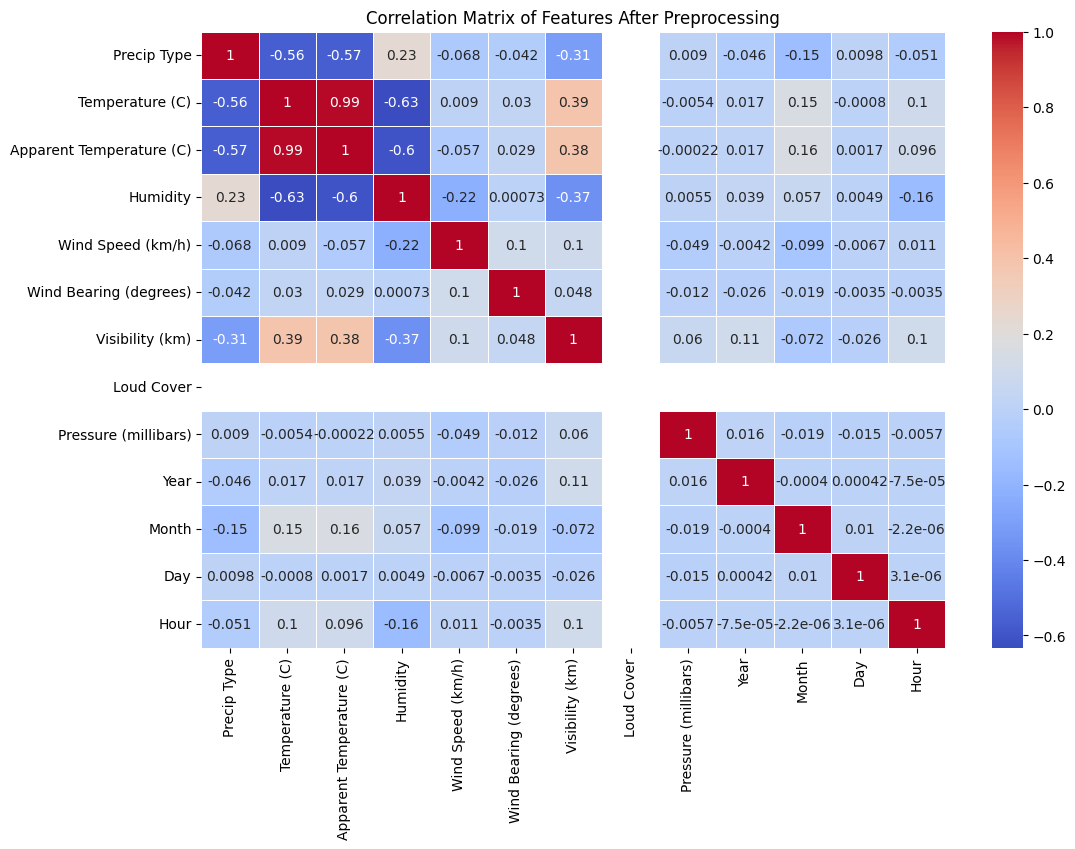

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features After Preprocessing')
plt.show()

### Plot distribusi variabel target

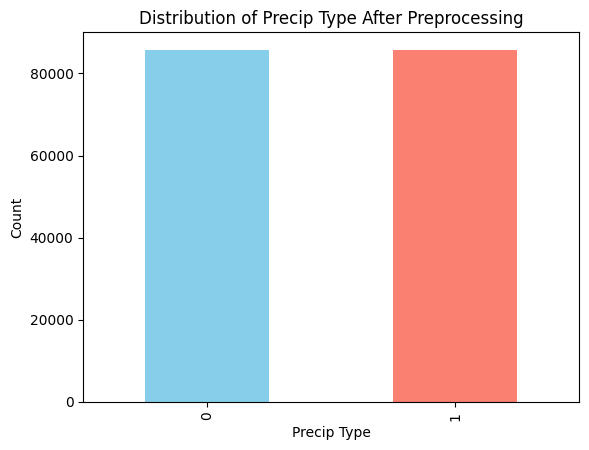

In [291]:
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Precip Type')
plt.ylabel('Count')
plt.title('Distribution of Precip Type After Preprocessing')
plt.show()

### data info after pre-processing

In [292]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               96453 non-null  int64  
 1   Temperature (C)           96453 non-null  float64
 2   Apparent Temperature (C)  96453 non-null  float64
 3   Humidity                  96453 non-null  float64
 4   Wind Speed (km/h)         96453 non-null  float64
 5   Wind Bearing (degrees)    96453 non-null  float64
 6   Visibility (km)           96453 non-null  float64
 7   Loud Cover                96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Year                      96453 non-null  int32  
 10  Month                     96453 non-null  int32  
 11  Day                       96453 non-null  int32  
 12  Hour                      96453 non-null  int32  
dtypes: float64(8), int32(4), int64(1)
memory usage: 8.1 MB


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000
mean,0.111059,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,2011.00029,6.523001,15.727100,11.499891
std,0.314207,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,3.16216,3.448501,8.802216,6.922049
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2005.00000,1.000000,1.000000,0.000000
25%,0.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,2008.00000,4.000000,8.000000,6.000000
50%,0.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,2011.00000,7.000000,16.000000,11.000000
75%,0.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,2014.00000,10.000000,23.000000,17.000000
max,1.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,2016.00000,12.000000,31.000000,23.000000


### Menyimpan data setelah praproses ke dalam file CSV

In [293]:
processed_df = pd.DataFrame(X, columns=df.drop(columns=['Precip Type']).columns)
processed_df['Precip Type'] = y.reset_index(drop=True)
processed_df.to_csv('processed_weather_data.csv', index=False)

### Hasil kerja model logistic regression

In [294]:
# Your codes are here (replace the following codes)
import time
time.sleep(10)

In [295]:
!jupyter nbconvert --to html "./UTS2024_IF540L_E_Kelompok_4.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./UTS2024_IF540L_E_Kelompok_4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 593700 bytes to UTS2024_IF540L_E_Kelompok_4.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#